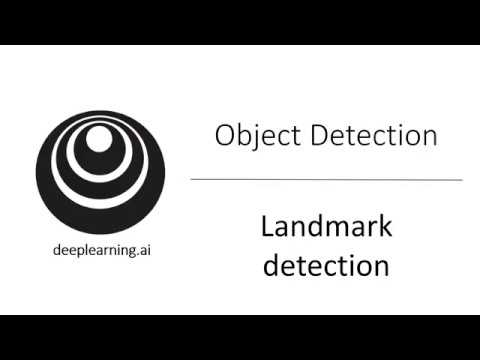

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('FAo0VmkuASE')

이전 강의에서는 Neural Network에서 4개의 숫자 bx, by, bh, bw를 출력하여 Object에 bounding box를 그려 localization을 하는 방법에 대하여 배웠습니다.

좀 더 일반적인 케이스에서는, Neural Network의 결과 값으로 output X와 image 내의 중요 부분이라 판단되는 좌표 Y를 받을 수 있습니다. 이 좌표를 landmark 라고 부릅니다. landmark는 Neural Network에서 Object를 인식하는 좌표가 됩니다.

![1](nb_images/28-1.png)
예를 들어 face recognition application을 만든다고 가정해 봅시다. 이 application에서는 이미지 내의 눈의 corner를 찾아내고 싶어 합니다. 눈 가장자리를 표현하는 좌표는 이미지 내의 x, y 좌표로 나타낼 수 있습니다. 

![2](nb_images/28-2.png)

Neural Network에서 눈의 코너 좌표를 찾고 싶으면 마지막 output layer에서 ($l_{x}, l_{y}$) 같은 좌표를 다른 결과물들과 같이 출력으로 받아 예측할 수 있습니다. 

![3](nb_images/28-3.png)

만약 양쪽 눈 코너 좌표를 모두 받고 싶으면 $(l_{1x}, l_{1y}), (l_{2x}, l_{2y}), (l_{3x}, l_{3y}), (l_{4x}, l_{4y})$와 같이 모든 4개의 좌표를 출력층에서 받으면 됩니다. 

![4](nb_images/28-4.png)

만약 4개의 코너가 아니라 눈의 테두리의 좌표를 좀 더 촘촘히 받고 싶다면 어떻게 해야 할까요? 입의 테두리 또한 받고 싶다면, 더 나아가 얼굴 전체의 테두리 좌표를 받고 싶다면 어떻게 해야 할까요? <br>
방법은 같습니다. 출력 층에서 원하는 좌표 만큼을 추가하여 결과를 받으면 됩니다. <br>
앞에서 설명한 바와 같이 위 좌표들을 landmark 라고 부르고 landmark를 이용하여 object의 edge를 검출할 수 있습니다.<br>
단, 이 때 Training set 데이터에 landmark들이 표현이 되어 있어야 학습할 수 있으므로 적당한 landmark의 갯수를 지정할 필요가 있습니다. 

![5](nb_images/28-5.png)

다시 예를 들어, 위 이미지를 input X로 받고 output의 첫번째 원소로 face 인지 아닌지에 대한 값을 받아야 합니다. 그 이후에 landmark 좌표를 받을 수 있습니다. 위 예제에서는 총 64개의 landmark 를 받는 것을 가정해 보았습니다. <br>
따라서 총 129개의 output unit을 가집니다. 1개는 face or not에 대한 결과값이고 나머지 128개는 총 64개의 landmark에 대한 x, y 좌표입니다. 

![6](nb_images/28-6.png)

위와 같은 방법으로 application은 face emotion을 감지해 내거나 얼굴 이미지에 모자 같은 다른 이미지를 적용시키곤 합니다. <br>
물론 64개의 <span class="mark">landmark 결과를 얻고 싶다면 Training set에 landmark 정보가 있어야</span> 합니다. 

![7](nb_images/28-7.png)

마지막으로 사람의 pose detection이 필요하다면, Key Position을 landmark로 잡아서 구할 수 있습니다. 예를 들어 Key Position으로 잡을 수 있는 곳이 가슴 한 가운데, 어깨, 팔꿈치 등이 있습니다. 위와 같이 landmark 좌표를 이용하여 pose를 detection 하는 것 또한 face detection 방법과 동일하고 Training set 데이터에 좌표 정보를 학습할 수 있는 데이터가 필요하게 됩니다. 

landmark detection을 위해서는 <span class="mark">모든 Training set에 대하여 좌표가 일관성 있게 준비되어야 합니다.</span> 예를 들어 1번 training image에 1번 좌표가 사람 왼쪽 눈의 왼쪽 코너라고 하면 2번 image의 1번 좌표 또한 왼쪽 눈의 왼쪽 코너가 되어야 합니다.

